## 문제
n×m 크기의 체스 판과, 상대팀의 Queen, Knight, Pawn의 위치가 주어져 있을 때, 안전한 칸이 몇 칸인지 세는 프로그램을 작성하시오. (안전한 칸이란 말은 그 곳에 자신의 말이 있어도 잡힐 가능성이 없다는 것이다.)

참고로 Queen은 가로, 세로, 대각선으로 갈 수 있는 만큼 최대한 많이 이동을 할 수 있는데 만약 그 중간에 장애물이 있다면 이동을 할 수 없다. 그리고 Knight는 2×3 직사각형을 그렸을 때, 반대쪽 꼭짓점으로 이동을 할 수 있다. 아래 그림과 같은 8칸이 이에 해당한다.

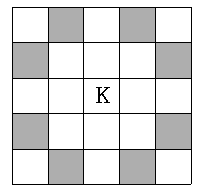

이때 Knight는 중간에 장애물이 있더라도 이동을 할 수 있다. 그리고 Pawn은 상대팀의 말은 잡을 수 없다고 하자(즉, 장애물의 역할만 한다는 것이다).

예를 들어 다음과 같이 말이 배치가 되어 있다면 진하게 표시된 부분이 안전한 칸이 될 것이다. (K : Knight, Q : Queen, P : Pawn)

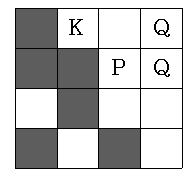

### 입력
첫째 줄에는 체스 판의 크기 n과 m이 주어진다. (1 ≤ n, m ≤ 1000) 그리고 둘째 줄에는 Queen의 개수와 그 개수만큼의 Queen의 위치가 입력된다. 그리고 마찬가지로 셋째 줄에는 Knight의 개수와 위치, 넷째 줄에는 Pawn의 개수와 위치가 입력된다. 즉 둘째 줄, 셋째 줄, 넷째 줄은  k, r1, c1, r2, c2, ..., rk, ck 이 빈 칸을 사이에 두고 주어진다는 것이다. 여기서 ri는 i번째 말의 행 위치, ci는 i번째 말의 열 위치를 의미한다. 한 칸에는 하나의 말만 놓인다고 가정한다. Knight, Queen, Pawn의 개수는 각각 100을 넘지 않는 음이 아닌 정수이다.

### 출력
첫째 줄에 n×m 체스판에 안전한 칸이 몇 칸인지 출력하시오.

### 예제 입력 1 
4 4
2 1 4 2 4
1 1 2
1 2 3

### 예제 출력 1 
6

### 예제 입력 2 
2 3
1 1 2
1 1 1
0
### 예제 출력 2 
0

#### 풀이
- 구현문제
- BOJ
- 나이트(Knight) : 대각선으로 두 칸 이동한 후 수직으로 또는 수평으로 한 칸 이동합니다. 이동할 때에는 다른 말의 위치와 관계없이 이동할 수 있습니다.
- 비숍(Bishop) : 대각선 방향으로 이동합니다. 이때 다른 말의 위치를 뛰어넘을 수 없습니다.
- 룩(Rook) : 수직 또는 수평 방향으로 이동합니다. 이때 다른 말의 위치를 뛰어넘을 수 없습니다.
- 퀸(Queen) : 대각선, 수직, 수평 방향으로 이동합니다. 이때 다른 말의 위치를 뛰어넘을 수 없습니다.

In [2]:
import sys
sys.setrecursionlimit(10**9)


# queen을 dfs 탐색
def dfs_queen(x, y, v):
    if x < 0 or x >= n or y < 0 or y >= m:
        return False

    if graph[x][y] != "p" and graph[x][y] != "k":
        if graph[x][y] != "q":
            graph[x][y] = "x"

        if v == 0:
            dfs_queen(x + 1, y, 0)
        elif v == 1:
            dfs_queen(x - 1, y, 1)
        elif v == 2:
            dfs_queen(x, y + 1, 2)
        elif v == 3:
            dfs_queen(x, y - 1, 3)
        elif v == 4:
            dfs_queen(x + 1, y + 1, 4)
        elif v == 5:
            dfs_queen(x + 1, y - 1, 5)
        elif v == 6:
            dfs_queen(x - 1, y + 1, 6)
        elif v == 7:
            dfs_queen(x - 1, y - 1, 7)
        return True
    return False


# knight를 dfs 탐색(1번씩 탐색)
def dfs_knight(x, y):
    check(x + 2, y + 1)
    check(x + 2, y - 1)
    check(x - 2, y + 1)
    check(x - 2, y - 1)
    check(x + 1, y - 2)
    check(x - 1, y - 2)
    check(x + 1, y + 2)
    check(x - 1, y + 2)


def check(x, y):
    if x < 0 or x >= n or y < 0 or y >= m:
        return False
    if graph[x][y] != "p" and graph[x][y] != "k" and graph[x][y] != "q":
        graph[x][y] = "x"
        return True
    return False


n, m = map(int, input().split())
queen = list(map(int, input().split()))
knight = list(map(int, input().split()))
pawn = list(map(int, input().split()))
graph = [["o"] * m for _ in range(n)]
cnt = 0

# 반복문을 통해 queen을 graph에 추가
for q in range(1, queen[0] * 2, 2):
    nx, ny = queen[q] - 1, queen[q + 1] - 1
    graph[nx][ny] = "q"

# 반복문을 통해 knight를 graph에 추가
for k in range(1, knight[0] * 2, 2):
    nx, ny = knight[k] - 1, knight[k + 1] - 1
    graph[nx][ny] = "k"

# 반복문을 통해 pawn을 graph에 추가
for p in range(1, pawn[0] * 2, 2):
    nx, ny = pawn[p] - 1, pawn[p + 1] - 1
    graph[nx][ny] = "p"

# 반복문을 통해 queen과 knight가 갈 수 있는 좌표를 탐색
for i in range(n):
    for j in range(m):
        if graph[i][j] == "q":
            dfs_queen(i, j, 0)
            dfs_queen(i, j, 1)
            dfs_queen(i, j, 2)
            dfs_queen(i, j, 3)
            dfs_queen(i, j, 4)
            dfs_queen(i, j, 5)
            dfs_queen(i, j, 6)
            dfs_queen(i, j, 7)

        elif graph[i][j] == "k":
            dfs_knight(i, j)

# queen과 knight가 갈 수 있는 좌표의 개수를 출력
for c in graph:
    cnt += c.count("o")

print(cnt)

4 4
2 1 4 2 4
1 1 2
1 2 3
6
